In [15]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

### Visualizing stock data

In [ ]:
stock_data = data.DataReader(name="BAJAJFINSV.NS", data_source="yahoo")
stock_data.head(5)

In [ ]:
# Applying plot on entire data frame
stock_data.plot()

In [ ]:
# Applying on perticular column
stock_data.plot(y="Close")

In [ ]:
# stock_data.plot(y=["Open", "Close"])
stock_data[["Open", "Close"]].plot()

### Modifying plot aesthetics using plt.style

In [2]:
stock_data = data.DataReader(name="BAJAJFINSV.NS", data_source="yahoo")
stock_data.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-12,4528.000000,4380.000000,4389.700195,4502.950195,145418.0,4494.663574
2017-04-13,4659.700195,4471.000000,4500.049805,4611.899902,133243.0,4603.413086
2017-04-17,4699.000000,4472.000000,4647.899902,4493.450195,137018.0,4485.181152
2017-04-18,4565.000000,4350.100098,4525.000000,4369.399902,129393.0,4361.358398
2017-04-19,4425.000000,4325.000000,4374.299805,4340.049805,86116.0,4332.062988


In [ ]:
plt.style.available

In [ ]:
plt.style.use("classic")
stock_data.plot(y="Close")

In [ ]:
plt.style.use("dark_background")
stock_data.plot(y="Close")

In [ ]:
plt.style.use("ggplot")
stock_data.plot(y="Close")

In [ ]:
stock_data.tail(10)["Close"].plot(kind="barh")

In [4]:
mean = stock_data['Close'].mean()

In [5]:
def stock_performance(stock_price):
    if stock_price >= mean:
        return "Good"
    elif stock_price < mean:
        return "Bad"

In [8]:
data = stock_data["Close"].apply(stock_performance).value_counts()

<AxesSubplot:ylabel='Close'>

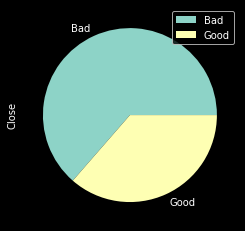

In [13]:
plt.style.use("dark_background")
data.plot(kind="pie", legend=True)

In [29]:
stock_data = data.DataReader(name="INFY.NS", data_source="yahoo", start="2022-01-01")

In [30]:
stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,1914.050049,1887.750000,1887.750000,1898.449951,3329616,1898.449951
2022-01-04,1906.650024,1878.000000,1898.449951,1899.150024,3921999,1899.150024
2022-01-05,1902.900024,1840.000000,1900.000000,1844.650024,6995719,1844.650024
2022-01-06,1828.000000,1800.000000,1828.000000,1817.800049,6449205,1817.800049
2022-01-07,1836.000000,1806.800049,1815.449951,1814.300049,4834389,1814.300049
...,...,...,...,...,...,...
2022-04-05,1889.599976,1857.150024,1883.800049,1861.099976,5472024,1861.099976
2022-04-06,1857.500000,1822.150024,1855.000000,1828.849976,5407453,1828.849976
2022-04-07,1828.150024,1807.550049,1821.050049,1811.000000,5797544,1811.000000


In [34]:
stock_data[stock_data['Close'] > 1800].count()

High         36
Low          36
Open         36
Close        36
Volume       36
Adj Close    36
dtype: int64